# Getting Started with AI Coding Assistants: LLMs and Prompt Engineering

This notebook provides an introduction to using Large Language Models (LLMs) and prompt engineering techniques for Python programming and data science. We'll cover the fundamental concepts, practical examples, limitations, and ethical considerations.


## 1. Introduction to Modern AI and LLMs

*   **What is "AI" in this context?**  We're primarily dealing with *Generative AI*, specifically Large Language Models (LLMs). These are sophisticated statistical models trained on vast amounts of text and code data.  They are *not* truly intelligent in the human sense (Artificial General Intelligence or AGI), but they are very good at pattern matching and predicting the most likely next word, code snippet, or response.

*   **Key Concepts:**
    *   **Large Language Models (LLMs):** Neural networks with billions (or trillions) of parameters.  Examples:
        *   **OpenAI:** GPT-3.5 Turbo, GPT-4, GPT-4o (multimodal: text, image, audio input), GPT-o1, GPT-o3-mini, etc.
        *   **Google:** Gemini 1.5 Pro, Gemini 2.0 Pro (preview)
        *   **Anthropic:** Claude 3.5 (Opus, Sonnet, Haiku)
        *   **Meta:** LLaMA 2, Llama 3
        *   **Mistral AI:** Mistral 7B, Mixtral 8x7B, Mistral Large, Mistral Small
        * **DeepSeek:** DeepSeek Coder
    *   **Transformers:** The dominant neural network architecture for LLMs.  The key innovation is the "attention mechanism," which allows the model to weigh the importance of different parts of the input.
    *   **Generative AI:**  A broader term that includes LLMs and models that create other types of content (e.g., images: DALL-E, Midjourney, Stable Diffusion).

*   **How LLMs Work (Simplified):**
    1.  **Tokenization:** Input text is broken down into smaller units called "tokens" (words, parts of words, or punctuation).
    2.  **Embedding:** Tokens are converted into numerical representations (vectors) that capture their meaning.
    3.  **Transformer Layers:**  The embedded tokens are processed through multiple layers of a transformer network.  The attention mechanism allows the model to focus on relevant parts of the input.
    4.  **Prediction:** The model predicts the probability of the next token, given the preceding tokens.
    5.  **Generation:**  The model repeatedly predicts the next token, building up the output sequence.

*   **Context Window:**  The maximum number of tokens the model can "see" at once (input + output).  This is a *critical* limitation.  Larger context windows allow for more complex reasoning and handling of longer inputs.
     * **Approximate Context Windows (October 26, 2024 - *Always check official documentation!*):**
         *   **GPT-4o:** ~128,000 tokens
        *   **GPT-4, GPT-4 Turbo:** ~8,000 - 128,000 tokens (depending on the specific model)
        *   **GPT-3.5 Turbo:** ~4,000 - 16,000 tokens
        *   **Claude 3 (Sonnet/Opus/Haiku):** ~200,000 tokens. Opus is more powerful, Haiku is faster/cheaper, Sonnet is in between.
        *   **Gemini 1.5 Pro:** Up to 1 *million* tokens (publicly available); up to 2 *million* tokens (preview)
        *   **Gemini 2.0 Pro:** Up to 2 *million* tokens (in preview).
        *   **LLaMA 3 (8B, 70B):** 8,192 tokens (8k)
        *    **Mistral Large:** 32,000 tokens (32k)
        *    **Mixtral 8x7B:** 32,000 tokens (32k)
        *   **Perplexity/Phind:** Varies, as they use other models as a backend.
*   **Retrieval-Augmented Generation (RAG):**
    *   **Problem:** LLMs have limited context and a knowledge cut-off date.
    *   **Solution:** Combine LLMs with *external knowledge sources*.
    *   **How it works:**
        1.  **Retrieval:** When a prompt is received, search a knowledge base (documentation, code, web) for relevant information.
        2.  **Augmentation:** Add the retrieved information to the prompt's context.
        3.  **Generation:** The LLM generates a response based on the *combined* context (original prompt + retrieved info).
    *   **Benefits:** Up-to-date information, more accuracy, reduced hallucinations, source citations (essential for verification!).
    *   **Examples:**  Bing Chat/Copilot (web search), Perplexity, some Gemini modes, custom RAG (LangChain).
    * See the [LangChain documentation](https://python.langchain.com/docs/modules/chains/popular/vector_db_qa) for more detail.


## 2. Prompt Engineering: The Key to Effective Use

Prompt engineering is the art and science of crafting effective input prompts to get the desired output from an LLM. It's *essential* for good results.

*   **Key Principles:**
    *   **Specificity:** Be *extremely* clear and unambiguous. Avoid vague instructions.
        *   **Bad:** "Write a function"
        *   **Good:** "Write a Python function named `calculate_average` that takes a list of numbers as input and returns their average. Handle the case where the list is empty by returning 0."
    *   **Context:** Provide relevant background information.
        *   **Example:** "Using the `pandas` library in Python, read a CSV file named `data.csv` into a DataFrame..."
    *   **Constraints:** Specify limitations or requirements.
        *   **Examples:** "The function should be no more than 20 lines long.", "The output should be in JSON format."
    *   **Persona:** Tell the AI to act as a specific role.
        *   **Example:** "You are a senior Python developer with 10 years of experience..."
    *   **Few-Shot Examples:** Provide *examples* of the input and desired output. This is one of the *most effective* techniques.
        *   **Example:**
            ```
            Input: [1, 2, 3, 4, 5]
            Output: 3.0
            
            Input: []
            Output: 0.0
            ```
    *   **Step-by-Step Instructions (Chain-of-Thought - CoT):** Break down complex tasks into sequential steps.  Encourage the model to "think step by step".
        *   **Example:** "First, read the data from the CSV file. Then, clean the data by removing any rows with missing values. Finally, calculate the average of the 'price' column."
    *   **Chain of Verification (CoV):** A more advanced technique where the LLM is prompted to generate and answer verification questions about its own response.  This helps to improve accuracy and reduce hallucinations.
        *   **Process:**
            1.  Generate initial response (often using CoT).
            2.  Generate verification questions.  (Prompt: "What questions should we ask to verify this solution?")
            3.  Answer verification questions *separately*.
            4.  Refine response based on the answers.
    *   **Iterative Refinement:** Don't expect perfection on the first try.  Refine your prompt based on the output, providing feedback and additional constraints.
    *   **Temperature and Top-p (Advanced):** These parameters (usually accessed via APIs) control the randomness of the model's output. Lower temperature = more deterministic. Top-p is another way to control randomness.
     * **Delimiters:** Use clear delimiters, like ```, to set off pieces of text or code for the model.
    * **Prompt Chaining:** Use a sequence of prompts, where the output of one prompt becomes the input to the next.
* **Other Techniques:**
    *   **Role Prompting:** 

In [ ]:
# Example of Few-Shot Prompting (This is Markdown, but we'll show code examples later)
"""
Prompt:

Write a Python function to add two numbers.  Here are some examples:

Input: 2, 3
Output: 5

Input: -1, 1
Output: 0

Input: 10, 0.5
Output: 10.5

Now, write a Python function to multiply two numbers.
"""


def add_two_numbers(a, b):
    """\
    Add two numbers together.

    Args:
        a: The first number.
        b: The second number.

    Returns:
        The sum of the two numbers.
    """

    return a + b

In [ ]:
def add_numbers(a, b):
    """
    Adds two numbers together.

    Args:
        a: The first number (integer or float)
        b: The second number (integer or float)

    Returns:
        The sum of a and b (integer or float)

    Examples:
        >>> add_numbers(2, 3)
        5
        >>> add_numbers(-1, 1)
        0
        >>> add_numbers(3.14, 2.86)
        6.0
    """
    return a + b



# Test cases for the add_numbers function

# Test case 1: Adding two positive integers
result = add_numbers(2, 3)
print(f"add_numbers(2, 3) = {result} (Expected: 5)")

# Test case 2: Adding a positive integer and a negative integer
result = add_numbers(5, -3)
print(f"add_numbers(5, -3) = {result} (Expected: 2)")

# Test case 3: Adding two negative integers
result = add_numbers(-4, -6)
print(f"add_numbers(-4, -6) = {result} (Expected: -10)")

# Test case 4: Adding a positive float and a negative float
result = add_numbers(3.5, -1.2)
print(f"add_numbers(3.5, -1.2) = {result} (Expected: 2.3)")

# Test case 5: Adding zero to a number
result = add_numbers(0, 7)
print(f"add_numbers(0, 7) = {result} (Expected: 7)")

# Test case 6: Adding two zeros
result = add_numbers(0, 0)
print(f"add_numbers(0, 0) = {result} (Expected: 0)")

# Test case 7: Adding a large number and a small number
result = add_numbers(1e10, 1e-10)
print(f"add_numbers(1e10, 1e-10) = {result} (Expected: 10000000000.0)")

add_numbers(2, 3) = 5 (Expected: 5)
add_numbers(5, -3) = 2 (Expected: 2)
add_numbers(-4, -6) = -10 (Expected: -10)
add_numbers(3.5, -1.2) = 2.3 (Expected: 2.3)
add_numbers(0, 7) = 7 (Expected: 7)
add_numbers(0, 0) = 0 (Expected: 0)
add_numbers(1e10, 1e-10) = 10000000000.0 (Expected: 10000000000.0)


## 3.  Using AI Coding Assistants: Tools and Platforms

Here's a list of common AI coding assistants.  *Always check official documentation for the latest features and pricing.*:

*   **ChatGPT (OpenAI):** Web-based chat interface. Good for general-purpose questions, code generation, and explanations. GPT-4o is the most advanced model, with strong reasoning and multimodal capabilities. GPT-3.5 Turbo is faster and cheaper.
*   **Gemini (Google):**  Gemini 1.5 Pro and 2.0 Pro (preview) offer *very* large context windows, making them suitable for working with large codebases or documents. Strong in reasoning and multimodal tasks.
    * **Perplexity AI**: Good for getting current, sourced information.
    * **Phind**: Another strong search tool.
*   **Claude 3.5 (Anthropic):**  Available as Opus (most capable), Sonnet, and Haiku (fastest/cheapest).  Known for large context windows and a focus on AI safety.  Excellent for writing and complex reasoning.
*   **GitHub Copilot (Microsoft):**  AI pair programmer that integrates directly into code editors (VS Code, Visual Studio, Neovim, JetBrains IDEs).  Provides real-time code suggestions and completions.  *Excellent* for in-IDE code generation.
*   **Copilot Chat:**  A chat interface within VS Code (and other IDEs) for interacting with Copilot.
*   **Amazon CodeWhisperer:**  Similar to Copilot, integrated with AWS.
*   **Tabnine:**  AI code completion tool.
*   **Replit Ghostwriter:**  AI assistance within the Replit online IDE.
* **Llama 3 (Meta):** Open-source LLM; often run locally (requires significant resources)
* **Mistral:** A series of open-source models, with strong performance, often available through Perplexity and Phind.

### 3.1 Using GitHub Copilot in VS Code (Example)

1.  **Installation:** Install the `GitHub Copilot` and `GitHub Copilot Chat` extensions from the VS Code Marketplace.  You'll need a GitHub account and a Copilot subscription (free trials, student/educator discounts often available).
2.  **Authentication:** Authenticate with your GitHub account.
3.  **Automatic Suggestions:** As you type, Copilot suggests code completions (grayed-out text). Press `Tab` to accept.
4.  **Inline Chat (Quick Chat):**  Press `Ctrl+I` (Windows/Linux) or `Cmd+I` (Mac) to open a quick chat window within the editor.
5.  **Sidebar Chat (Copilot Chat):**  View -> Open View... -> Copilot Chat.  This provides a more persistent chat history.
6.  **Copilot Chat Commands:**
    *   `@workspace`:  Refers to your entire project.
    *   `@vscode`:  Asks questions about VS Code itself.
    *   `/doc`:  Generate documentation.
    *   `/explain`: Explain selected code.
    *   `/fix`: Suggest fixes for errors.
    *   `/tests`: Generate unit tests.
    * `/new`: Create new file.
    * `/help`: Show help.
7.  **Prompts:** Be specific, use comments to guide Copilot, and iterate.

**Example (using comments to guide Copilot):**

```python
# Function to calculate the factorial of a number
# (Copilot will likely generate the rest of the function here)
```


## 4. Limitations and Pitfalls

*   **Context Window Limits:**  Even with large context windows, LLMs have finite memory.  Strategies like summarizing long conversations and breaking down tasks are important.
*   **Hallucinations:** LLMs can generate confident but *incorrect* information. *Always verify*.
*   **Biases:** LLMs can reflect biases in their training data.
*   **Lack of True Understanding:**  LLMs are pattern-matching machines, not conscious entities.
*   **Inconsistency:**  You may get different responses to the same prompt.
*   **Over-Reliance:**  Don't blindly trust LLM output.  Treat it as an assistant, not a replacement for your own knowledge and critical thinking.
*   **Data Cutoff:**  LLMs have a knowledge cutoff date (unless they have web browsing capabilities).
*   **Security Risks:** *Never* include sensitive information (passwords, API keys, personal data) directly in prompts. Use environment variables or secrets management tools instead.
*   **Mathematical Reasoning:** While LLMs are improving, they are not reliable for complex calculations. Use dedicated tools or libraries for precise math.
* **Copyright Infringement** LLMs may generate output that is substantially similar to copyrighted material.


## 5. Verification Strategies: ALWAYS VERIFY!

Because of the limitations listed above, *verification is absolutely essential*.  Here are some strategies:

*   **Chain of Verification (CoV):**  Use prompts to make the LLM generate and answer verification questions about its own output.
*   **Unit Tests:** Write unit tests to check the functionality of generated code.
*   **Code Reviews:** Have a human review the code.
*   **Static Analysis Tools:** Use linters and static analyzers (e.g., Pylint, Flake8, mypy) to catch errors and style issues.
*   **Manual Review:** *Carefully* read and understand the code before using it.
*   **Compare with Known Good Code/Documentation** Compare the generated output to a trusted, verifiable source.
*   **Run the Code:**  The most basic check – does it even run without errors?
* **Check Edge Cases** Consider how the code behaves with unusual, boundary, or invalid input.

## 6. Ethical Considerations

The use of AI in software development raises several ethical concerns:

1.  **Bias and Discrimination:** AI models can perpetuate and amplify biases present in their training data.
2.  **Lack of Transparency:**  "Black box" models make it difficult to understand *why* a decision was made.
3.  **Accountability:**  Who is responsible when AI-generated code causes harm?
4.  **Job Displacement:**  Automation of coding tasks can lead to job losses.
5.  **Privacy and Security:**  Protecting sensitive code and data used in training and interaction.
6.  **Intellectual Property:**  Potential copyright issues with AI-generated code.
7.  **De-skilling/Over-Reliance:** Potential for developers to lose fundamental skills.
8.  **Code Quality and Maintainability:**  AI-generated code may be difficult to maintain long-term.
    *   **Mitigation:**
       *   **Sanitization**: Remove or redact any private, sensitive, or confidential information from the code and data that will be shared with the language model.
   *   **Differential Privacy**: Add noise to the data, making it difficult to identify individual data points while still allowing the model to learn.
   *   **Federated Learning**: Train a model on multiple decentralized datasets without explicitly sharing the data.

**Key Principle:** Ethical considerations must be integrated throughout the entire development process.

## 7. What LLMs cannot (yet) do well, and how humans contribute
While AI assistants are powerful, they have limitations. Human developers remain essential for:
* **Creativity and Innovation**: Coming up with truly novel solutions and architectures. While LLMs can remix existing code, they struggle with genuine originality outside their training data.
* **Deep Understanding of Business Requirements**: Translating complex, nuanced business needs into technical specifications. LLMs can assist with this, but human judgment is crucial.
* **System-Level Design and Architecture**: Making high-level design decisions about how different components of a system interact.  LLMs are better at smaller, well-defined tasks.
* **Ethical Decision-Making**:  Ensuring that software is developed and used responsibly, considering the ethical implications.
* **Debugging Complex, Interconnected Systems**:  Troubleshooting issues that span multiple modules or systems, especially when the root cause is not obvious.
* **Dealing with Ambiguity and Uncertainty**:  Handling situations where requirements are unclear or constantly changing.  Humans are better at adapting to ambiguity.
* **Communication and Collaboration**:  Working effectively with other developers, stakeholders, and users.  This includes understanding and responding to human emotions and social cues.
* **Testing and Quality Assurance**: Human developers are needed for tasks like exploratory testing. LLMs have a hard time generating high-quality tests. 
* **Long-Term Maintenance and Evolution**:  Adapting software to changing needs and technologies over time.  LLMs can assist with refactoring, but they don't have a long-term vision.
* **Judgment and Experience**:  Applying years of experience to make informed decisions, especially in situations where there is no clear "right" answer. 
* **Understanding the "Why"**: Grasping the fundamental *purpose* of the code, not just the *how*.  This is critical for making good design choices.

## 8.  Practical Examples (Python)

Let's explore some practical examples of using AI coding assistants.  Remember to *always verify* the generated code!

### 8.1.  Golden Ratio Spiral

First, a classic example: plotting a golden ratio spiral using `matplotlib`.

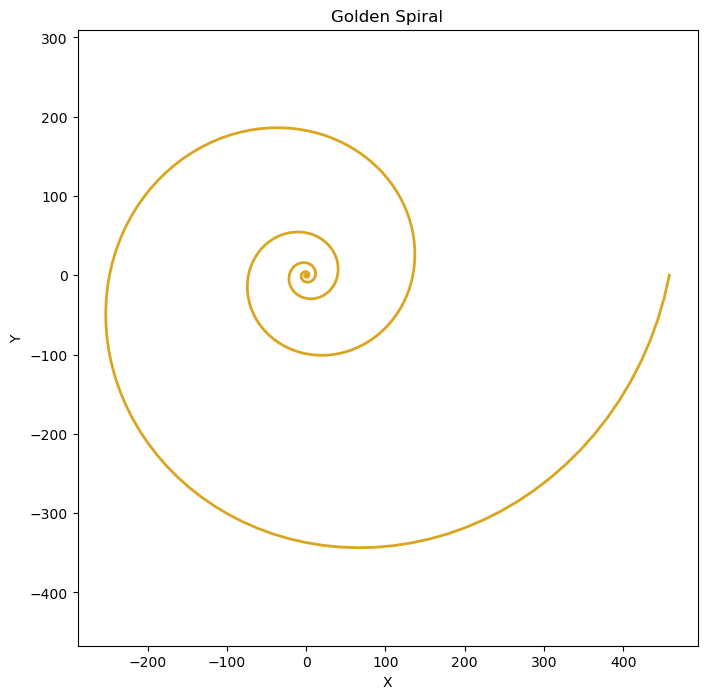

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_golden_spiral(n_turns=5, points_per_turn=100):
    """
    Plots an approximation of the Golden Spiral using matplotlib.

    Args:
        n_turns: The number of full turns of the spiral to generate.
        points_per_turn: The number of points to calculate per turn.  Higher
                         values result in a smoother curve.
    """
    phi = (1 + np.sqrt(5)) / 2  # The Golden Ratio
    growth_factor = phi ** (2 / np.pi)  # Radius growth per quarter turn (90 degrees)

    # Create an array of angles (in radians)
    theta = np.linspace(0, 2 * np.pi * n_turns, n_turns * points_per_turn)

    # Calculate the radius for each angle.  The radius grows exponentially.
    radius = growth_factor ** (theta / (np.pi / 2))

    # Convert polar coordinates (radius, theta) to Cartesian (x, y)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Create the plot
    plt.figure(figsize=(8, 8))  # Use a square figure for equal aspect ratio
    plt.plot(x, y, color="goldenrod", linewidth=2)  # Nicer color and line width
    plt.title("Golden Spiral")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")  # Ensure x and y axes are scaled equally
    plt.show()


# Example usage:
plot_golden_spiral(n_turns=5)

### 8.2. Function, Derivative, and Numerical Approximation

Next, let's create a function, its derivative, and test the derivative using the central difference method.

In [ ]:
import math


# Original function
def exp_of_sqrt(x):
    """
    Compute the exponential of the square root of a given number x.

    Parameters:
    - x: A floating-point number.

    Returns:
    - The exponential of the square root of x.
    """
    return math.exp(math.sqrt(x))


# Analytical derivative of the original function
def derivative_exp_of_sqrt(x):
    """
    Compute the derivative of the exponential of the square root of x with respect to x.

    Parameters:
    - x: A floating-point number.

    Returns:
    - The derivative of the exponential of the square root of x.
    """
    if x <= 0:
        raise ValueError(
            "x must be greater than 0 for the square root to be defined in real numbers."
        )
    return (math.exp(math.sqrt(x))) / (2 * math.sqrt(x))


# Central difference method to estimate the derivative
def central_difference_estimate(f, x, h=1e-5):
    """
    Estimate the derivative of function f at point x using central difference.

    Parameters:
    - f: The function to differentiate.
    - x: The point at which to evaluate the derivative.
    - h: Step size (small number).

    Returns:
    - Central difference approximation of the derivative
    """
    return (f(x + h) - f(x - h)) / (2 * h)


# Test the function
x = 4.0  # Point at which to evaluate the derivative
analytical_derivative = derivative_exp_of_sqrt(x)
central_difference_derivative = central_difference_estimate(exp_of_sqrt, x)

print(f"Analytical derivative at x = {x}: {analytical_derivative}")
print(f"Central difference estimate at x = {x}: {central_difference_derivative}")

# Add some more test cases, including edge cases and different values of h
test_cases = [1.0, 4.0, 9.0, 0.25, 1e-6]
h_values = [1e-3, 1e-5, 1e-7]

for h in h_values:
    print(f"\nTesting with h = {h}:")
    for x in test_cases:
        try:
            analytical = derivative_exp_of_sqrt(x)
            numerical = central_difference_estimate(exp_of_sqrt, x, h)
            print(f"  x = {x}:")
            print(f"    Analytical: {analytical}")
            print(f"    Numerical:  {numerical}")
            print(f"    Difference: {abs(analytical - numerical)}")
        except ValueError as e:
            print(f"  x = {x}: {e}")

### 8.3. Data Cleaning with Pandas (Example)

This example demonstrates how you might use an LLM (like Copilot or ChatGPT) to help with data cleaning.  We'll simulate a prompt and a *possible* response.  **Remember to always verify the code!**

**Prompt (using Chain of Thought):**

```
Write Python code using Pandas to read a CSV file named 'data.csv' into a DataFrame. Let's think step by step. First, read the data.  Then, check for missing values in the 'Age' column. If there are missing values, fill them with the mean of the 'Age' column.  Also, check if the 'Age' column contains any non-numeric data; if so, print an error message. Finally, print the cleaned DataFrame.  Include error handling for the case where the file doesn't exist. Add comments to explain each step.
```

**Possible LLM Response (Code - Needs Verification!):**

In [2]:
import pandas as pd

try:
    # Step 1: Read the CSV file into a DataFrame
    df = pd.read_csv("data.csv")

    # Step 2: Check if the 'Age' column exists
    if "Age" in df.columns:
        # Step 3: Check for non-numeric data in the 'Age' column
        if pd.api.types.is_numeric_dtype(df["Age"]):
            # Step 4: Calculate the mean of the 'Age' column
            mean_age = df["Age"].mean()

            # Step 5: Fill missing values in 'Age' with the mean
            df["Age"].fillna(mean_age, inplace=True)
        else:
            print("Error: 'Age' column contains non-numeric data.")
    else:
        print("Error: 'Age' column not found in DataFrame.")

    # Step 6: Print the cleaned DataFrame (or handle it as needed)
    print(df)

except FileNotFoundError:
    print("Error: 'data.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: 'data.csv' not found.


**Verification Steps (Crucial!):**

1.  **Create `data.csv`:**  You'll need to create a sample `data.csv` file to test this code.  Create several versions:
    *   A version with *no* missing values in 'Age'.
    *   A version *with* missing values in 'Age' (use `NaN` in Pandas to represent missing values).
    *   A version with *non-numeric* data in 'Age' (e.g., include a string like "Unknown").
    *   A version where the 'Age' column is completely *missing*.
    * Create an  API keys, personal data) directly in prompts. Use environment variables or secrets management tools instead.
*   **Mathematical Reasoning:** While LLMs are improving, they are not reliable for complex calculations. Use dedicated tools or libraries for precise math.
* **Copyright Infringement** LLMs may generate output that is substantially similar to copyrighted material.


### 8.4. Example: Generating Unit Tests with Copilot

Let's say we have the following Python function (in a file named `my_functions.py`):

```python
# my_functions.py
def calculate_average(numbers):
    """Calculates the average of a list of numbers."""
    if not numbers:
        return 0
    return sum(numbers) / len(numbers)
```
You could then use the Copilot Chat, or in some cases, even simpler, the inline Copilot features.

In [3]:
# my_functions.py
def calculate_average(numbers):
    """Calculates the average of a list of numbers."""
    if not numbers:
        return 0
    return sum(numbers) / len(numbers)

In VS Code, with the `my_functions.py` file open, you could:

1.  **Right-click** on the `calculate_average` function and select "Copilot" -> "Generate Tests".
2.  **Copilot Chat:** Open Copilot Chat and use the prompt: `@workspace /tests Write unit tests for the calculate_average function in my_functions.py`

Copilot might generate something like this (in a new file, often named `test_my_functions.py`):

In [ ]:
# import unittest
# from my_functions import calculate_average

# class TestCalculateAverage(unittest.TestCase):

#     def test_empty_list(self):
#         self.assertEqual(calculate_average([]), 0)

#     def test_positive_numbers(self):
#         self.assertEqual(calculate_average([1, 2, 3, 4, 5]), 3)

#     def test_mixed_numbers(self):
#         self.assertEqual(calculate_average([-1, 0, 1, 2]), 0.5)

#     def test_float_numbers(self):
#         self.assertAlmostEqual(calculate_average([1.5, 2.5, 3.5]), 2.5)

# if __name__ == '__main__':
#     unittest.main()

**Key Points about the Generated Tests:**

*   **`unittest` Framework:** Copilot often uses the built-in `unittest` framework, which is a good standard choice.
*   **Test Cases:** It creates a test class (`TestCalculateAverage`) and several test methods (`test_empty_list`, `test_positive_numbers`, etc.).  Each test method checks a specific scenario.
*   **Assertions:** It uses assertion methods like `assertEqual` and `assertAlmostEqual` to check if the actual output of the function matches the expected output.
*   **`if __name__ == '__main__':`:**  This allows you to run the tests directly by running the test file (e.g., `python test_my_functions.py`).

**Verification (Again!):**
* **Run the tests:**  Make sure the tests pass!
*   **Review the tests:**  Are the test cases comprehensive?  Do they cover all the important scenarios and edge cases? You might need to *add* more tests.  For instance, the generated tests *don't* test for invalid input (e.g., a list containing strings).  You should add a test like this:

    ```python
    def test_invalid_input(self):
        with self.assertRaises(TypeError):
            calculate_average([1, 2, 'a', 4])
    ```

This improved test checks that a `TypeError` is raised when the input list contains a non-numeric value. This demonstrates a key point: LLMs can *help* you write tests, but they don't replace the need for careful test design.

## 9. Conclusion
LLMs and AI coding assistants are powerful tools that can significantly enhance productivity and code quality *when used responsibly*. Prompt engineering, especially using techniques like Chain of Thought and Chain of Verification, helps to get better results. However, thorough verification of the generated code and a strong awareness of limitations and ethical considerations are absolutely essential. Experiment, iterate, and always prioritize human oversight and critical thinking.

## 10. Further Resources

*   **OpenAI Documentation:** [https://platform.openai.com/docs/introduction](https://platform.openai.com/docs/introduction)
*   **GitHub Copilot Documentation:** [https://docs.github.com/en/copilot](https://docs.github.com/en/copilot)
*   **Prompt Engineering Guide:** [https://www.promptingguide.ai/](https://www.promptingguide.ai/)
*   **Learn Prompting:** [https://learnprompting.org/](https://learnprompting.org/)
*   **LangChain Documentation:** [https://python.langchain.com/docs/get_started/introduction](https://python.langchain.com/docs/get_started/introduction) (for building applications with LLMs, including RAG)
